In [1]:
from ase.io import read,write
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ase.neighborlist import neighbor_list
from collections import Counter
plt.style.use('~/plot.mplstyle')
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['mathtext.default']='regular'

In [2]:
def count_coord(atoms):
    i_Si = neighbor_list('i', atoms, {('Si', 'Si'): 2.85})
    i_SiH = neighbor_list('i', atoms, {('Si', 'H'): 1.8}) 
    coord_Si = np.bincount(i_Si)
    coord_SiH = np.bincount(i_SiH)
    return coord_Si, coord_SiH


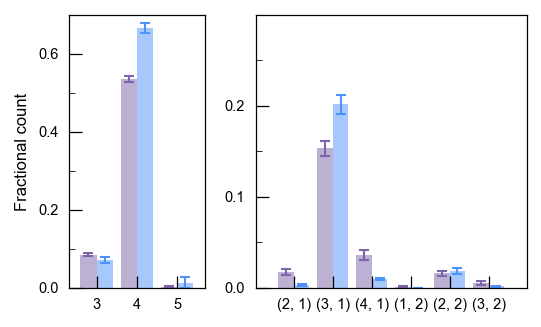

In [3]:
cutoffs = {('Si', 'Si'): 2.85,('Si', 'H'): 1.8} 

cm=1/2.54
fig,axes=plt.subplots(1,2, figsize=(10*cm,6*cm), width_ratios=[1,2])

indices=['0', '-1']
colors=['#7C65A9', '#4E93FC']
offsets=[-0.2, 0.2]
labels=['cleaved', 'annealed']

for index, color, offset, label in zip(indices, colors, offsets, labels):
    inds=np.arange(1,11)
    
    dict_SiSi={3: np.zeros(shape=(len(inds))), 4: np.zeros(shape=(len(inds))), 5: np.zeros(shape=(len(inds)))}
    dict_SiH={(2, 1): np.zeros(shape=(len(inds))), (3, 1): np.zeros(shape=(len(inds))), (4, 1): np.zeros(shape=(len(inds))), (1, 2): np.zeros(shape=(len(inds))), (2, 2): np.zeros(shape=(len(inds))), (3, 2): np.zeros(shape=(len(inds)))}


    for ind in inds:
        atoms=read(f'../../data/paper/a-surfaces/anneals/{ind}/500K/dump_custom_pace', index=index)
        symbols = atoms.get_chemical_symbols()
        count_Si = np.zeros(len(atoms), dtype=int)
        count_H  = np.zeros(len(atoms), dtype=int)
        i, j= neighbor_list('ij', atoms, cutoffs)

        # Count neighbors by element type
        for idx in range(len(i)):
            a = i[idx]
            b = j[idx]
            if symbols[b] == 'Si':
                count_Si[a] += 1
            elif symbols[b] == 'H':
                count_H[a] += 1
        
        coord_combos = list(zip(count_Si[atoms.numbers==14], count_H[atoms.numbers==14]))
        hist = Counter(coord_combos)

        i=np.arange(len(hist.items()))
        for combo, num_atoms in sorted(hist.items()):
            if combo[1]==0:
                if combo[0]==4:
                    dict_SiSi[4][ind-1]=num_atoms/len(atoms[atoms.numbers==14])

                elif combo[0]<=3:
                    dict_SiSi[3][ind-1]=num_atoms/len(atoms[atoms.numbers==14])
                else:
                    dict_SiSi[5][ind-1]=num_atoms/len(atoms[atoms.numbers==14])


            elif combo in dict_SiH.keys():
                dict_SiH[combo][ind-1]=num_atoms/len(atoms[atoms.numbers==14])

            else:
                pass

    

    for key, i in zip(dict_SiSi.keys(), np.arange(len(dict_SiSi.keys()))):
        item=dict_SiSi[key]
        item_av=np.mean(item)
        item_std=np.std(item)

        axes[0].bar(i+offset, item_av, alpha=0.5, color=color, width=0.4)
        axes[0].errorbar(i+offset, item_av, yerr=item_std, color=color, capsize=2.5)

    

    for key, i in zip(dict_SiH.keys(), np.arange(len(dict_SiH.keys()))):
        item=dict_SiH[key]
        item_av=np.mean(item)
        item_std=np.std(item)

        axes[1].bar(i+offset, item_av, alpha=0.5, color=color, width=0.4)
        axes[1].errorbar(i+offset, item_av, yerr=item_std, color=color, capsize=2.5 , label=label)


axes[1].set_xticks(np.arange(len(dict_SiH.keys())))
axes[1].set_xticklabels(dict_SiH.keys())

axes[1].set_ylim(bottom=0, top=0.3)
axes[1].set_yticks(np.arange(0, 0.3, 0.1))
axes[1].set_yticks(np.arange(0, 0.3, 0.05), minor=True)


axes[0].set_ylabel('Fractional count')
axes[0].set_xlabel('')
axes[0].set_ylim(bottom=0, top=0.7)
axes[0].set_yticks(np.arange(0, 0.8, 0.2))
axes[0].set_yticks(np.arange(0, 0.6, 0.1), minor=True)
axes[0].set_xticks(np.arange(3))
axes[0].set_xticklabels(np.arange(3,6))


plt.subplots_adjust(wspace=0.25)